Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

In [4]:
import pandas as pd                         
import numpy as np                          
import matplotlib.pyplot as plt             
import seaborn as sns 

Now let us define the Decision Tree Algorithm

In [17]:
iris_data = pd.read_csv('/content/Iris.csv')
print(iris_data)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]



Creating a copy

It is necessary to create a copy of original data so that it remains unaffected.

In [19]:
iris = iris_data.copy()

The structure of data

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Summarizing the data

In [21]:
iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [22]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [23]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [24]:
iris.shape

(150, 6)

In [25]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [26]:
iris.dtypes.value_counts()

float64    4
object     1
int64      1
dtype: int64

Checking for missing values

In [27]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It has been observed that there are no missing values in the data.

Checking relation of petal and sepal using pairplot

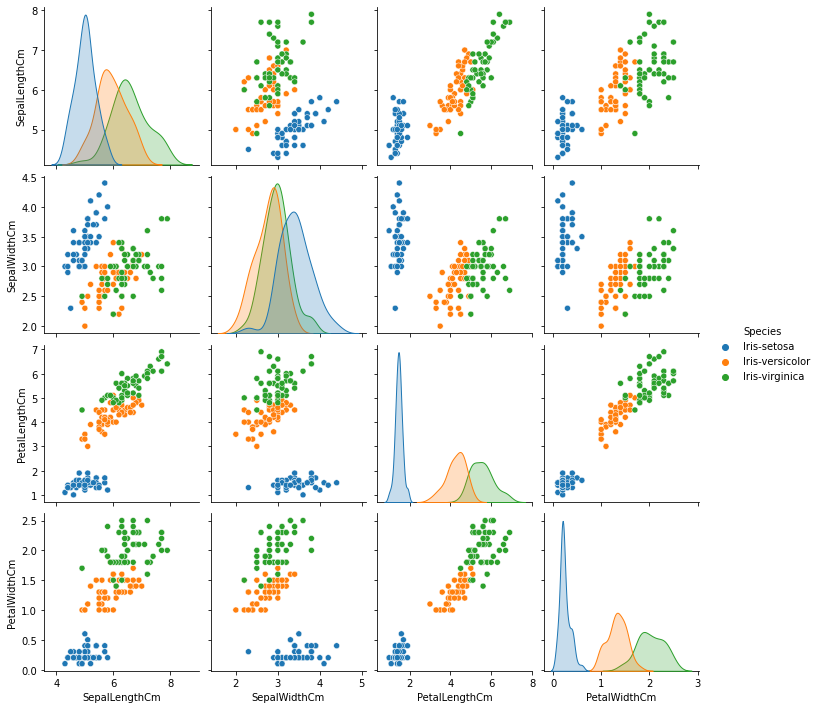

In [28]:
iris = iris.iloc[:, 1:]
sns.pairplot(iris, hue = 'Species')

It can be seen that one species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.

Importing the libraries

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier              
from sklearn import tree

Preparing the data

In [30]:
iris = datasets.load_iris()

Splitting the data

In [31]:
X = iris.data
Y = iris.target

Preprocessing the data

In [32]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.70, random_state = 1)


Model Evaluation

In [36]:

from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(clf, X, Y, cv = 3)
accuracy_scores

array([0.98, 0.94, 1.  ])

In [37]:
accuracy_scores.mean()

0.9733333333333333

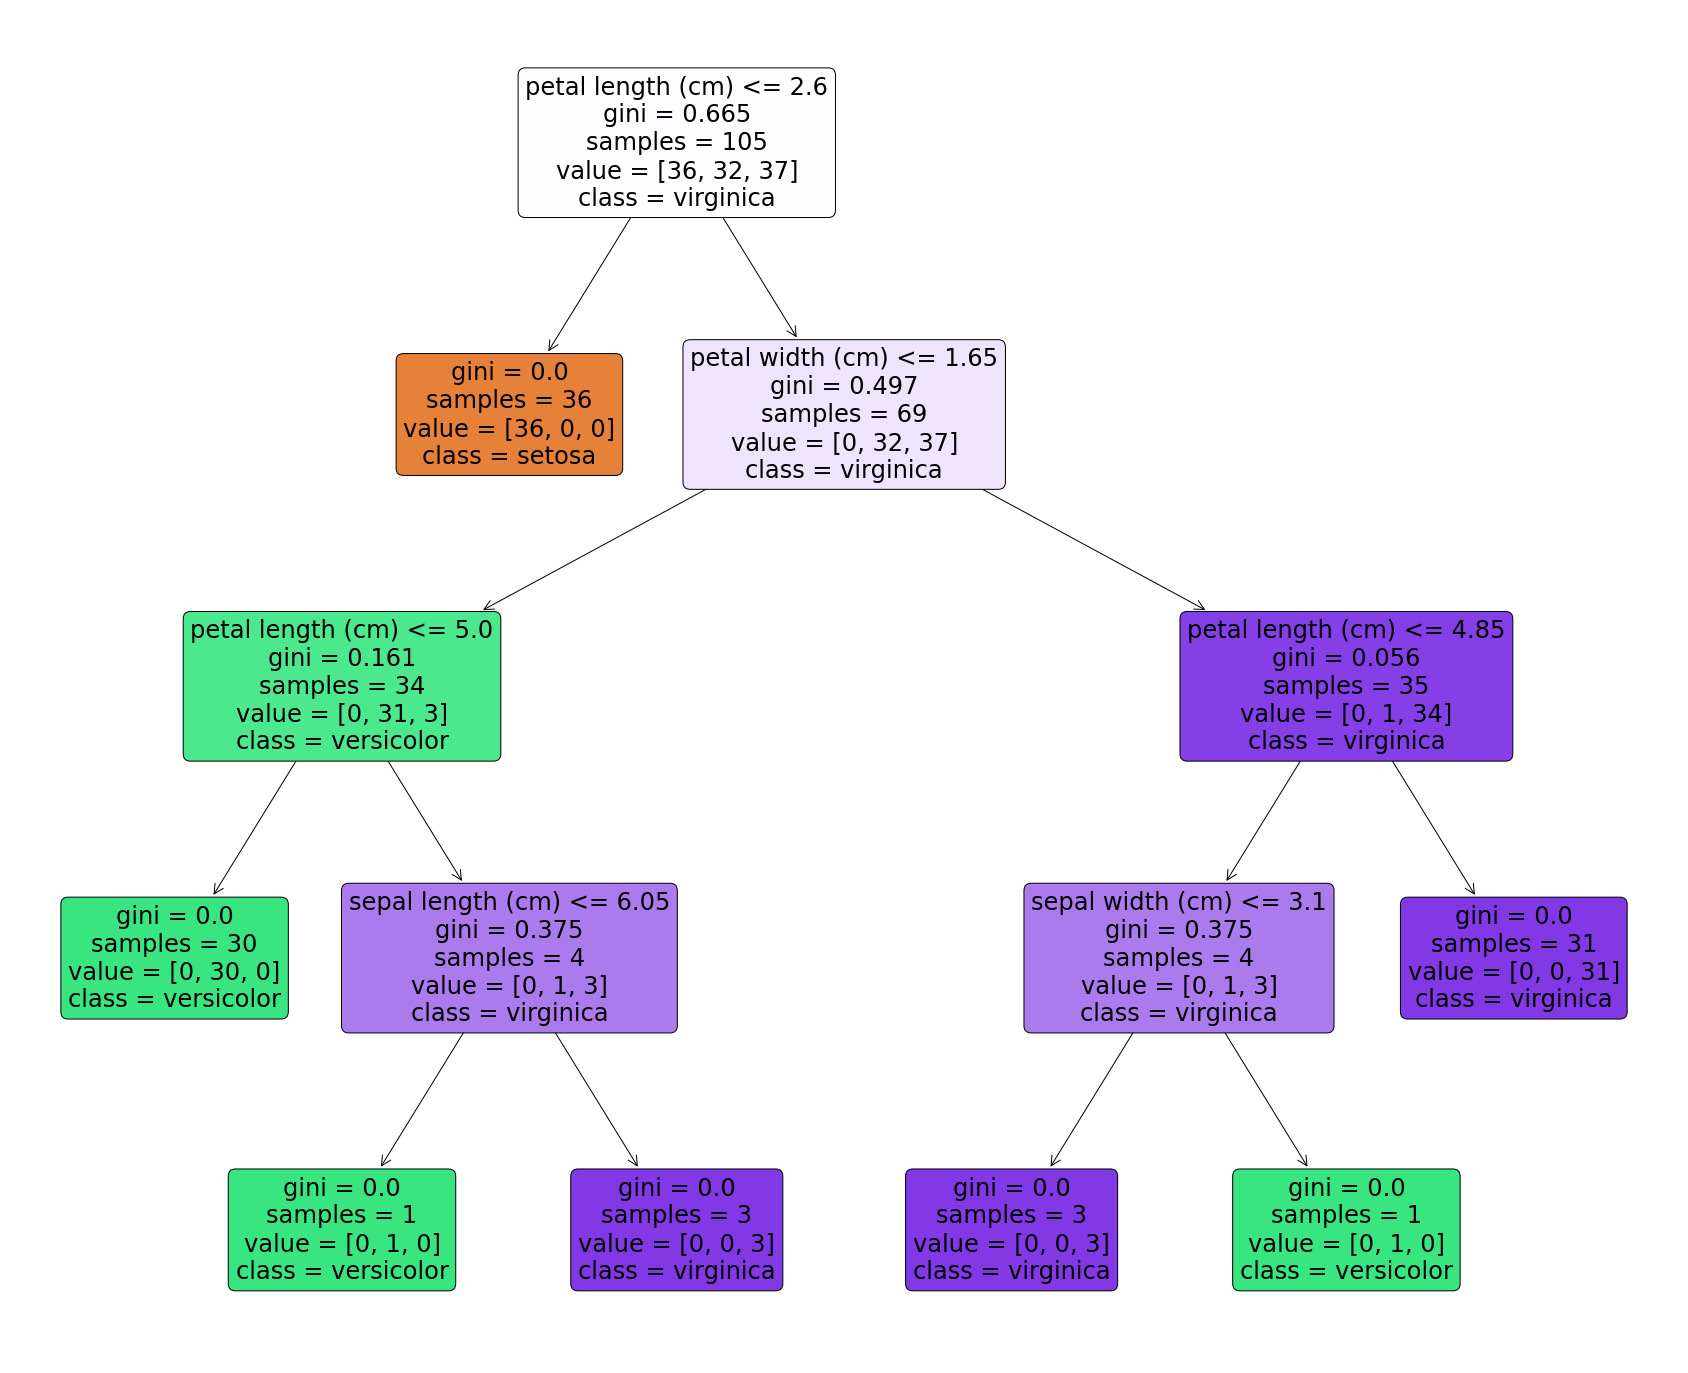

In [39]:
# Plotting the decision tree
fig = plt.figure(figsize = (30, 25))
_ = tree.plot_tree(clf,
                  feature_names = iris.feature_names,
                  class_names = iris.target_names,
                  filled = True, rounded = True)